In [1]:
!pip install tensorflow scikit-learn matplotlib seaborn



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, f1_score


In [2]:
data_dir = 'dataset'  
IMG_SIZE = (224, 224)
BATCH_SIZE = 32


In [3]:
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_generator = datagen.flow_from_directory(
    data_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)


Found 1561 images belonging to 15 classes.
Found 383 images belonging to 15 classes.


In [4]:
base_model = MobileNetV2(input_shape=IMG_SIZE + (3,), include_top=False, weights='imagenet')
base_model.trainable = False


In [5]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
output = Dense(15, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)


In [6]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10,
    callbacks=[early_stop]
)


Epoch 1/10


c:\Users\Devika\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


49/49 ━━━━━━━━━━━━━━━━━━━━ 39s 714ms/step - accuracy: 0.5004 - loss: 1.7198 - val_accuracy: 0.8668 - val_loss: 0.5319
Epoch 2/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 36s 736ms/step - accuracy: 0.9218 - loss: 0.2624 - val_accuracy: 0.8851 - val_loss: 0.4136
Epoch 3/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 36s 746ms/step - accuracy: 0.9789 - loss: 0.1128 - val_accuracy: 0.8877 - val_loss: 0.3916
Epoch 4/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 32s 663ms/step - accuracy: 0.9833 - loss: 0.0985 - val_accuracy: 0.9034 - val_loss: 0.3590
Epoch 5/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 32s 660ms/step - accuracy: 0.9907 - loss: 0.0558 - val_accuracy: 0.9191 - val_loss: 0.3357
Epoch 6/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 33s 666ms/step - accuracy: 0.9991 - loss: 0.0297 - val_accuracy: 0.9112 - val_loss: 0.3647
Epoch 7/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 32s 660ms/step - accuracy: 1.0000 - loss: 0.0233 - val_accuracy: 0.9164 - val_loss: 0.3418
Epoch 8/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 32s 659ms/step - accuracy: 1.0000 - loss: 0.0161 - val_accuracy: 0.906

In [7]:
model.save('animal_classifier_model.h5')


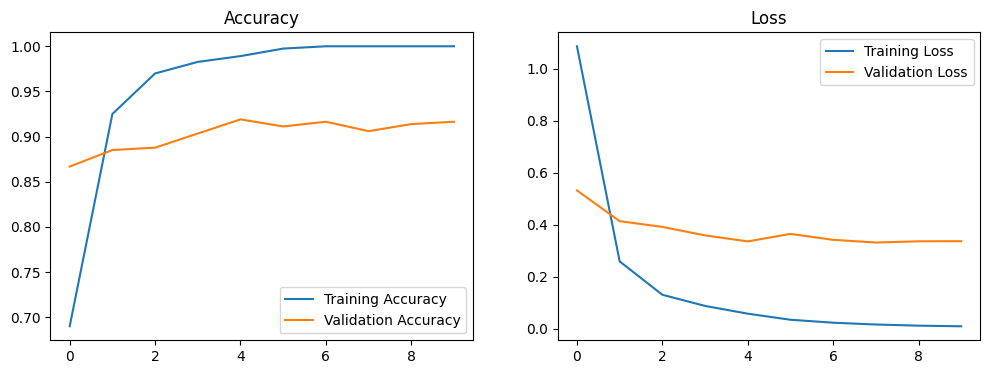

In [8]:
def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    epochs_range = range(len(acc))
    
    plt.figure(figsize=(12, 4))
    
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Accuracy')
    
    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Loss')
    
    plt.show()

plot_history(history)


In [9]:
val_generator.reset()
predictions = model.predict(val_generator)
y_pred = np.argmax(predictions, axis=1)
y_true = val_generator.classes


12/12 ━━━━━━━━━━━━━━━━━━━━ 10s 716ms/step


In [10]:
class_names = list(val_generator.class_indices.keys())

print(classification_report(y_true, y_pred, target_names=class_names))

accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1 Score: {f1:.4f}")


              precision    recall  f1-score   support

        Bear       0.92      0.88      0.90        25
        Bird       0.90      0.96      0.93        27
         Cat       0.92      1.00      0.96        24
         Cow       0.70      0.81      0.75        26
        Deer       0.81      0.88      0.85        25
         Dog       0.91      0.83      0.87        24
     Dolphin       0.92      0.92      0.92        25
    Elephant       0.91      0.81      0.86        26
     Giraffe       1.00      1.00      1.00        25
       Horse       0.88      0.88      0.88        26
    Kangaroo       0.92      0.92      0.92        25
        Lion       0.92      0.85      0.88        26
       Panda       0.93      0.96      0.95        27
       Tiger       1.00      0.88      0.94        25
       Zebra       1.00      1.00      1.00        27

    accuracy                           0.91       383
   macro avg       0.91      0.91      0.91       383
weighted avg       0.91   

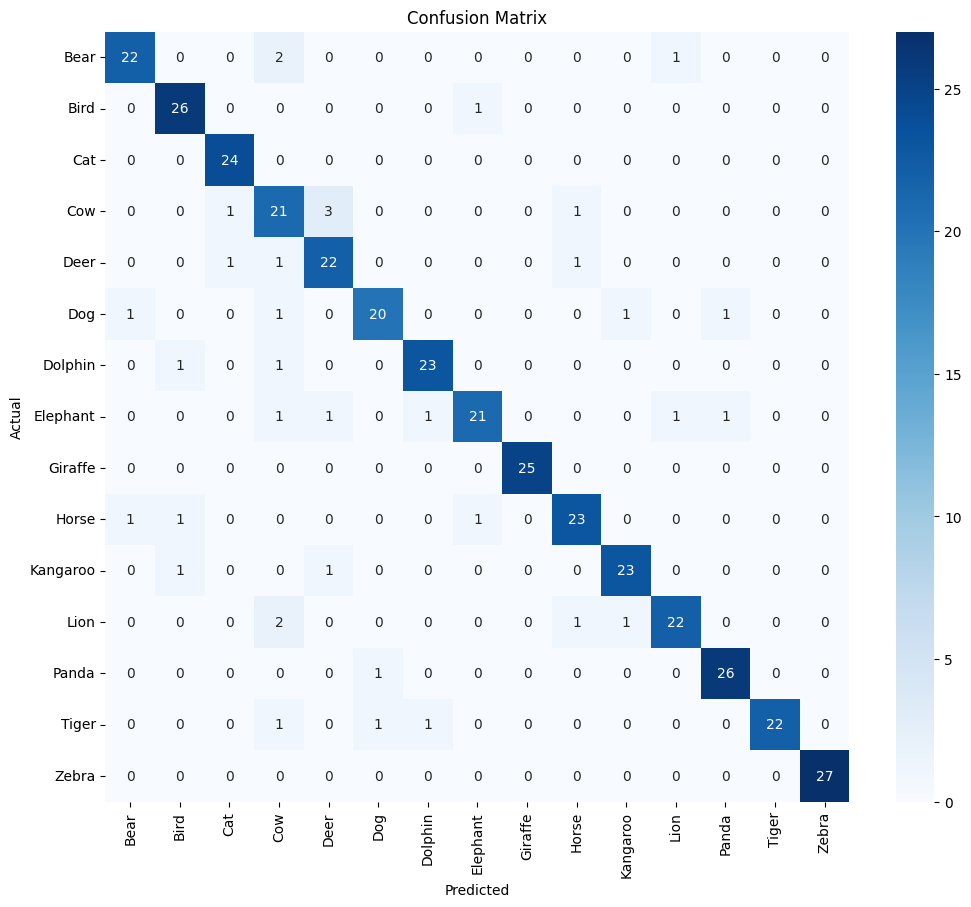

In [11]:
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_names, yticklabels=class_names, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [12]:
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt


In [13]:
class_names = ['Bear', 'Bird', 'Cat', 'Cow', 'Deer', 'Dog', 'Dolphin', 'Elephant',
               'Giraffe', 'Horse', 'Kangaroo', 'Lion', 'Panda', 'Tiger', 'Zebra']


In [14]:
def predict_animal(img_path, model):
    img = image.load_img(img_path, target_size=(224, 224))  # Resize
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array /= 255.0  # Normalize

    prediction = model.predict(img_array)
    predicted_class = class_names[np.argmax(prediction)]

    # Display image + prediction
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Predicted: {predicted_class}")
    plt.show()

    return predicted_class


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


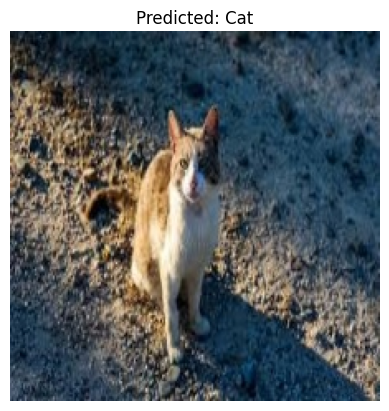

'Cat'

In [15]:
image_path = 'image.jpeg'  # Example: 'test_images/zebra1.jpg'
predict_animal(image_path, model)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


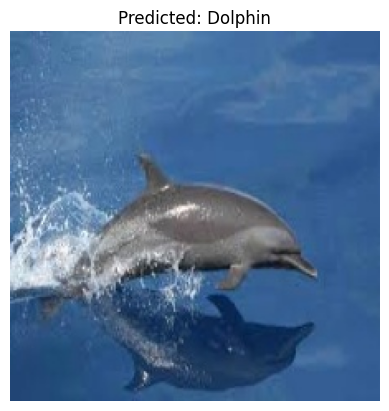

'Dolphin'

In [16]:
image_path='animal.jpg'
predict_animal(image_path, model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


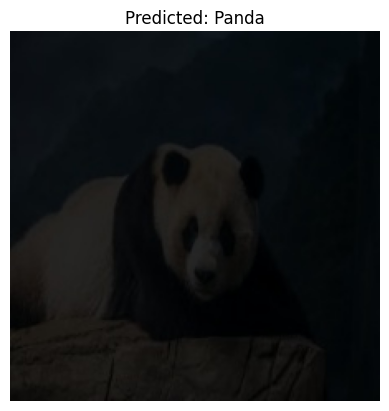

'Panda'

In [17]:
image_path='animal2.jpg'
predict_animal(image_path,model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


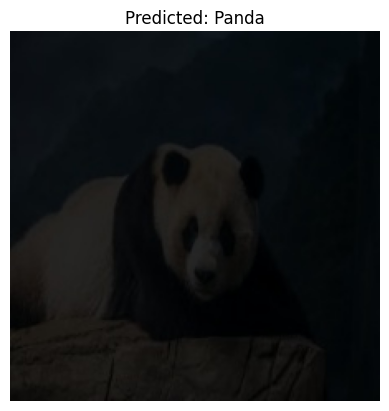

'Panda'

In [18]:
image_path='animal2.jpg'
predict_animal(image_path,model)